## Обучение модели распознавать рукописные цифры

#### Информация о датасете:
Объёмная база данных образцов рукописного написания цифр. База данных является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения в первую очередь на основе нейронных сетей. 

#### Задачи:
* Чтение и преобразование данных  
* Настройка и проверка модели  
* Обучение на отложенных данных  
* Оценка точности

#### Версии библиотек:
* tensorflow 2.5.0
* keras 2.5.0
* matplotlib 3.3.2

In [114]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta

# Чтобы не кидал ошибку при компилировании
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [115]:
# импортируем данные и создаем обучающую и тестовую выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

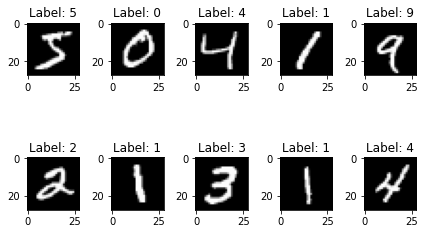

In [117]:
images = x_train[:10]
labels = y_train[:10]
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [5]:
num_classes = 10 # цифры 0-9
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # размер изображения 28x28
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# переводим изображения в диапазон [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
# преобразование векторных классов в бинарные матрицы 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_test = np_utils.to_categorical(y_test, num_classes)
print('Размер обучающей выборки:', x_train.shape[0])
print('Размер тестовой выборки:', x_test.shape[0])

Размер обучающей выборки: 60000
Размер тестовой выборки: 10000


In [55]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1))) 

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizer_v1.Adadelta(), metrics=['accuracy'])

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
flatten_16 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                82976     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 83,626
Trainable params: 83,626
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
model.fit(x_train, y_train, batch_size=200, epochs=25, validation_split=0.2, validation_data=(x_test, y_test))

round(model.evaluate(x_test, y_test)[1], 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 2s 36us/sample - loss: 7.8193e-04 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9779
Epoch 2/25
60000/60000 [==============================] - 2s 36us/sample - loss: 7.2672e-04 - accuracy: 1.0000 - val_loss: 0.1105 - val_accuracy: 0.9797
Epoch 3/25
60000/60000 [==============================] - 2s 37us/sample - loss: 6.5058e-04 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9797
Epoch 4/25
60000/60000 [==============================] - 2s 38us/sample - loss: 5.8437e-04 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9793
Epoch 5/25
60000/60000 [==============================] - 2s 39us/sample - loss: 6.2601e-04 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9793
Epoch 6/25
60000/60000 [==============================] - 2s 38us/sample - loss: 4.9824e-04 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9792
Epoch 7/25
60000/60000 [========

0.98